#[E-02]회귀(Regression)

###이번 프로젝트에서는 **회귀(Regression)**모델을 **직접 구현**및 기존에 있는 **모델을 사용**해보겠습니다.

#회귀(Regression)란
###**회귀**는 여러개의 독립변수와 한 개의 **종속변수** 간의 **상관관계**를 **모델링**하는 기법을 의미합니다.<br/>
###예를 들어 아파트 방 개수, 방 크기, 주변 학군과 같은 여러 개의 독립변수에 따라 아파트 가격이라는<br/>
###종속변수가 어떤 관계를 나타내는지를 **모델링**하고 **예측**하는 것입니다.<br/>
###즉 주어지는 여러 값(독립변수)들로 예측을 할 수 있단 뜻 같습니다.<br/>
###관련 모델로는 **릿지(Ridge), 라쏘(Lasso), LinearRegression**등이 있습니다.

---

#구글 드라이브 임포트(사전 설정)



In [1]:
#나중에 구글드라이브에 저장된 csv파일을 가지고 올것이므로
#구글 드라이브를 임포트 시킵니다.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


구글 드라이브를 임포트 시키면 코랩 사용시 **구글 드라이브에 올려둔 파일이나 이미지를 경로만 지정하게 된다면 자유롭게 사용**하실 수 있습니다.

**상당히 유용한 기능**이고 많이 사용하는 기능이므로 여기서도 사용해보겠습니다.

---

#1.당뇨병 데이터(load_diabetes)


####당뇨병 데이터는 **sklearn에서 지원**해주는 데이터 입니다.<br/>
####**load_diabetes를 사용**하여 불러오실 수 있습니다.

##1-1 데이터 가져오기

In [2]:
#필요한 라이브러리 및 데이터셋을 임포트 시키겠습니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

#나중에 비교해볼것입니다.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

##데이터 살펴보기

In [3]:
#키값과 데이터 라벨값을 한번 알아봅시다.

diabets_data = load_diabetes()

print(diabets_data.keys())
print(diabets_data.data)
print(diabets_data.feature_names)

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


####불러온 데이터를 살펴보니 이해가 되지 않습니다.<br/>좀 더 정확히 알아보도록 하겠습니다.

In [4]:
print(diabets_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

데이터 설명을 확인해보았습니다 좀 더 이해가 잘 가시나요?<br/>:Number of Instances: 442 (인스턴스 수는 442개가 존재합니다.)<br/>:Number of Attributes: First 10 columns are numeric predictive values<br/>(10개의 열이 있고. age, sex, bmi를 말하는거 같습니다.)<br/>:Target: Column 11 is a quantitative measure of disease progression one year after baseline<br/>(1년 동안 질병 진행 정도를 측정했다고 하네요)

- 추가적으로 설명을 해보자면 컬럼 값은 **-0.2 ~ 0.2 사이**에 위치 시키도록 했다고 하네요 <br/>그래서 값이 저런거 같습니다.

##데이터 모양 확인

In [5]:
print(diabets_data.data.shape)
print(diabets_data.target.shape)

(442, 10)
(442,)


####data는 442 * 10 크기의 **2차원 배열**이고 target은 442개의 요소를 가진 **1차원 배열** 입니다.

##판다스로 출력

In [6]:
#행에 데이터 열에 feature_names를 입력하여 데이터 프레임화 시켜서 출력해보았습니다.

df = pd.DataFrame(diabets_data.data, columns = diabets_data.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


####숫자가 이상한 이유는 **모든 특성을 -0.2 ~ 0.2 사이에 분포하도록 조정**해서 그렇습니다.

##타겟값 알아보기

In [7]:
print(diabets_data.target)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

####위에 데이터 프레임으로 확인하였을때, age, sex, bmi등등 해서 총 10개의 값이 있었습니다.<br/> 
####그 모든 특성을 고려한 첫번째 타깃 값이 151이라는 것입니다.
####타겟값은 **정수**이며 **25에서 345사이에 숫자**로 이루어져있다고 합니다.

##시각화(Visualization)

###0 ~ 9(컬럼이 10개 이므로)특성과 타겟값으로 산점도를 그려 보겠습니다.
### - 0 ~ 9 번은 age, sex, bmi등(feature_names)을 말하는 것입니다.

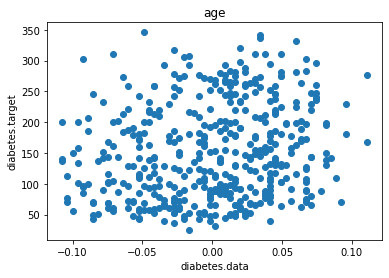

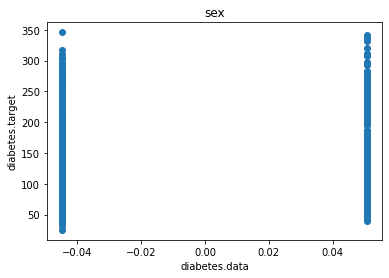

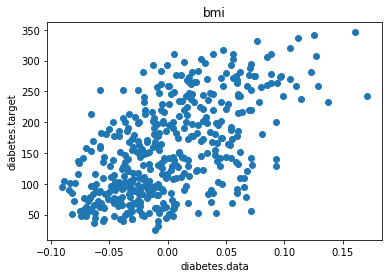

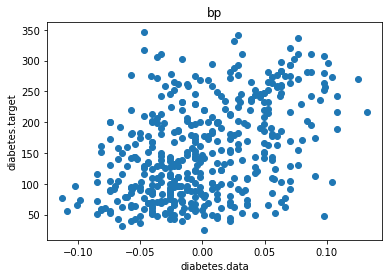

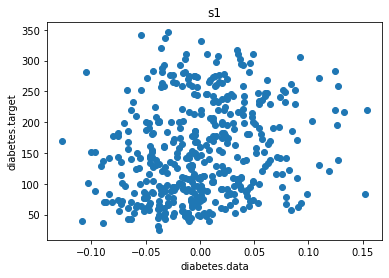

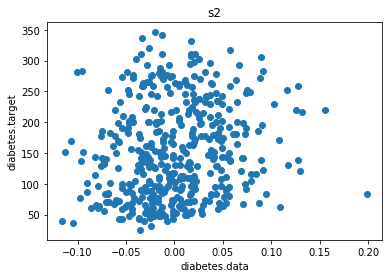

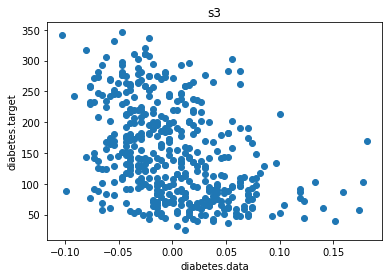

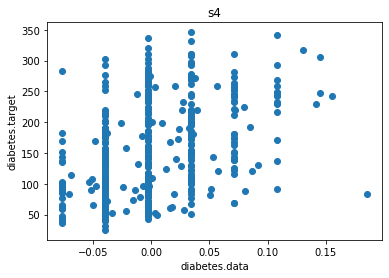

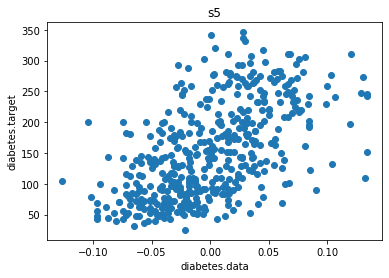

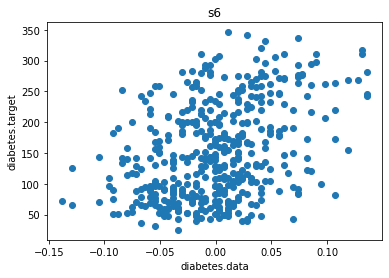

In [8]:
#데이터에 0 ~ 9번째 특성과 타깃값으로 산점도를 그려보겠습니다.
title_name = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
for i in range(0, 10):
  plt.scatter(diabets_data.data[:,i], diabets_data.target)
  plt.title(title_name[i])
  plt.xlabel('diabetes.data')
  plt.ylabel('diabetes.target')
  plt.show()

####잠시 코드를 보자면<br/>**`plt.scatter(diabets_data.data[:,i], diabets_data.target)`**<br/>
####이런 코드가 보이실것입니다.<br/>**`plt.scatter(diabets_data.data[:i], diabets_data.target)`**<br/>
####이런식으로 작성을 하게 되면 오류가 발생합니다.<br/>왜 그럴까요?

####**배열의 크기**가 달라서 그런거 같습니다.<br/>
####따라서 [:,i]이런식으로 지정해주면 **i번째 특성과 타겟 데이터로 산점도를 그린다**는 말이 됩니다.

##데이터 정보 출력

In [9]:
#info 함수는 데이터에 대한 전반적인 정보를 나타냅니다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


####데이터 타입은 실수 타입으로 되어있습니다.

In [10]:
#describe 함수는 컬럼별 요약 통계량을 나타내줍니다.

df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


##1-2 모델에 입력할 데이터와 예측 데이터 준비

#### **회귀 모델은 분류 모델과는 다르게** 현재 주어진 값으로 **예측**을 하는 것이기 때문에<br/>**입력 데이터를 X 예측 데이터를 y**로 정합니다.

In [11]:
#저장된 값들을 numpy array로 변환해서 저장하겠습니다.

df_X = diabets_data.data
df_y = diabets_data.target

X = np.array(df_X)
y = np.array(df_y)

print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


##1-3 데이터 분리


In [12]:
#train_test_split을 사용하여 데이터를 분리해줍니다.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


####이때 **test_size = 0.2**는 test에 **전체 데이터중 20퍼를 할당**한다는 의미입니다.
####**random_state는 랜덤 특성**인데 42로 지정하였습니다.

##1-4 모델 준비하기

####위에 데이터에 대한 설명에서는 값이 -0.2 ~ 0.2 사이에 위치하도록 조정했다고 나와있습니다.<br/>
####만약 저 데이터에 **정규화**를 하게 되면 어떻게 변할지 궁금합니다.<br/>
####그럼 **정규화를 해보고 진행**해보겠습니다.

##정규화하기

In [13]:
#최솟값은 0, 최대값은 1로 0~1사이 값으로 만들어주는
#MinMaxScaler를 사용하여 정규화 시켜줍니다.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

####데이터값을 0과 1사이의 범위값으로 변환합니다.(음수 값이 존재하면 -1 ~ 1값으로 변환합니다.)<br/>
####**`scaler.fit`**으로 선언을 하고 **`transform`**를 통해 정규화를 해줍니다.<br/>
####이때 train이랑 test를 나눈 상태이므로 **둘다 변환**시켜줍니다.

##1-5 손실함수 loss 정의하기

In [14]:
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
  predictions = 0
  for i in range(10):
    predictions += X[:, i] * W[i]
  predictions += b
  return predictions

def MSE(num1, num2):
  mse = ((num1 - num2) ** 2).mean()
  return mse

def loss(X, W, b, y):
  predictions = model(X, W, b)
  L = MSE(predictions, y)
  return L

####10개의 정보로 당뇨병을 예측해야하므로 10인 W와 1개 숫자인 b를 준비합니다. 
####연산식이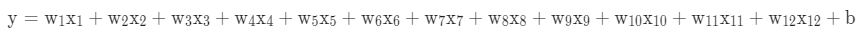

####이므로 for 반목문을 사용해 W * X를 10번 수행 시키고 마지막에 b를 더해줍니다.
```
predictions += X[:, i] * W[i]
predictions += b
return predictions
```
####그게 예측값 **predictions**입니다.


####**MSE는 평균제곱오차** 입니다.


```
predictions = model(X, W, b)
L = MSE(predictions, y)
```


####MSE값으로 loss를 구하겠습니다.
####MSE에 예측값과 실제값을 넣어 오차율을 계산한다는 의미입니다.

##1-6 기울기를 구하는 gradient 함수 구현하기

In [15]:
def gradient(X, W, b, y):
  n = len(W)
  y_pred = model(X, W, b)
  dW = 1/n * 2 * X.T.dot(y_pred - y)
  db = 2 * (y_pred - y).mean()
  return dW, db

##1-7 학습률 설정 및 모델 학습 시작

In [16]:
learning_rate = 0.01

losses = []

for i in range(1, 2001):
  dW, db = gradient(X_train, W, b, y_train)
  W -= learning_rate * dW
  b -= learning_rate * db
  L = loss(X_train, W, b, y_train)
  losses.append(L)
  if i % 100 == 0:
    print('횟수 : %d , 오차율 : %0.4f' % (i, L))

횟수 : 100 , 오차율 : 2939.9985
횟수 : 200 , 오차율 : 2909.9551
횟수 : 300 , 오차율 : 2898.7939
횟수 : 400 , 오차율 : 2892.5074
횟수 : 500 , 오차율 : 2888.5205
횟수 : 600 , 오차율 : 2885.8060
횟수 : 700 , 오차율 : 2883.8491
횟수 : 800 , 오차율 : 2882.3719
횟수 : 900 , 오차율 : 2881.2171
횟수 : 1000 , 오차율 : 2880.2908
횟수 : 1100 , 오차율 : 2879.5338
횟수 : 1200 , 오차율 : 2878.9063
횟수 : 1300 , 오차율 : 2878.3804
횟수 : 1400 , 오차율 : 2877.9353
횟수 : 1500 , 오차율 : 2877.5553
횟수 : 1600 , 오차율 : 2877.2280
횟수 : 1700 , 오차율 : 2876.9437
횟수 : 1800 , 오차율 : 2876.6944
횟수 : 1900 , 오차율 : 2876.4740
횟수 : 2000 , 오차율 : 2876.2772


##오차율 시각화

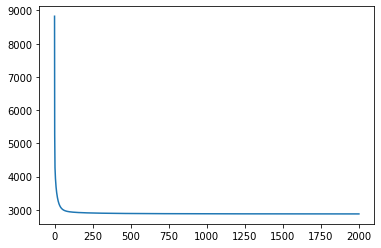

In [17]:
plt.plot(losses)
plt.show()



```
losses = []
```
####저 변수에 loss값을 저장해두었습니다.<br/>
####**loss값은 점점 떨어지고 있었습니다**.<br/>
####따라서 출력하면 저런 모양의 그래프로 보여지게 됩니다.


##정규화를 진행하지 않고 해보기

In [18]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 42)

W1 = np.random.rand(10)
b1 = np.random.rand()

def model1(X1, W1, b1):
  predictions1 = 0
  for i in range(10):
    predictions1 += X1[:, i] * W1[i]
  predictions1 += b1
  return predictions1

def MSE1(num3, num4):
  mse = ((num3 - num4) ** 2).mean()
  return mse

def loss1(X1, W1, b1, y1):
  predictions1 = model(X1, W1, b1)
  L1 = MSE(predictions1, y1)
  return L1

def gradient1(X1, W1, b1, y1):
  n1 = len(W1)
  y_pred1 = model1(X1, W1, b1)
  dW1 = 1/n1 * 2 * X1.T.dot(y_pred1 - y1)
  db1 = 2 * (y_pred1 - y1).mean()
  return dW1, db1

learning_rate1 = 0.01

losses1 = []

for i in range(1, 2001):
  dW1, db1 = gradient1(X_train1, W1, b1, y_train1)
  W1 -= learning_rate1 * dW1
  b1 -= learning_rate1 * db1
  L1 = loss1(X_train1, W1, b1, y_train1)
  losses1.append(L1)
  if i % 100 == 0:
    print('횟수 : %d , 오차율 : %0.4f' % (i, L1))

횟수 : 100 , 오차율 : 4690.9508
횟수 : 200 , 오차율 : 3675.5272
횟수 : 300 , 오차율 : 3389.4097
횟수 : 400 , 오차율 : 3234.1005
횟수 : 500 , 오차율 : 3136.0798
횟수 : 600 , 오차율 : 3069.7927
횟수 : 700 , 오차율 : 3023.4193
횟수 : 800 , 오차율 : 2990.3947
횟수 : 900 , 오차율 : 2966.6146
횟수 : 1000 , 오차율 : 2949.3457
횟수 : 1100 , 오차율 : 2936.7099
횟수 : 1200 , 오차율 : 2927.3958
횟수 : 1300 , 오차율 : 2920.4789
횟수 : 1400 , 오차율 : 2915.3027
횟수 : 1500 , 오차율 : 2911.3983
횟수 : 1600 , 오차율 : 2908.4291
횟수 : 1700 , 오차율 : 2906.1517
횟수 : 1800 , 오차율 : 2904.3894
횟수 : 1900 , 오차율 : 2903.0130
횟수 : 2000 , 오차율 : 2901.9276


####똑같은 학습률을 설정했을때, **정규화를 진행**한 쪽이 좀 더 정확도가 높다고 할수 있습니다.

##1-8 test 데이터 성능 확인

In [19]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2892.673342191117

####train 데이터의 오차율과 거의 비슷합니다.

##1-9 예측한 데이터와 정답 데이터 시각화

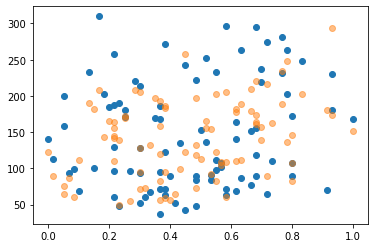

In [20]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction, alpha = 0.5)
plt.show()



```
alpha = 0.5
```
####라는 변수를 주어 예측값들을 불투명하게 설정해보았는데 겹치는 것도 있지만 아닌 것이 상당히 많습니다.<br/>
####아마 **loss값이 커서** 그런거 같습니다.



####이번에는 **딥러닝 모델**을 만들어서 오차율을 확인해보겠습니다.

---

##간단한 딥러닝 모델로 성능을 확인해보자

##정규화를 진행한 데이터로 딥러닝 모델 학습

In [21]:
import tensorflow as tf

model = tf.keras.models.Sequential([    
    tf.keras.layers.Dense(100, activation = 'relu', input_shape = (10, )),
    tf.keras.layers.Dense(90, activation = 'relu'),  
    tf.keras.layers.Dense(80, activation = 'relu'),
    tf.keras.layers.Dense(70, activation = 'relu'),
    tf.keras.layers.Dense(60, activation = 'relu'),
    tf.keras.layers.Dense(30, activation = 'relu'),
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'relu')
])



```
#첫번째 레이어에 Dense 값은 임의의 값을 넣고 input_shape값만 제대로 맞춰줍니다.
tf.keras.layers.Dense(100, activation = 'relu', input_shape = (10, ))
```
####그다음 레이어만 반복적으로 쌓은 기본적인 모델을 만들었습니다.


In [22]:
model.compile(loss = 'mse', optimizer = 'adam')
model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test), batch_size = 10)

Epoch 1/10
36/36 [==============================] - 1s 11ms/step - loss: 27664.5332 - val_loss: 14449.9414
Epoch 2/10
36/36 [==============================] - 0s 5ms/step - loss: 6701.4199 - val_loss: 4138.8906
Epoch 3/10
36/36 [==============================] - 0s 5ms/step - loss: 4652.8330 - val_loss: 3727.1665
Epoch 4/10
36/36 [==============================] - 0s 5ms/step - loss: 4204.2964 - val_loss: 3693.1763
Epoch 5/10
36/36 [==============================] - 0s 5ms/step - loss: 4056.9377 - val_loss: 3267.6211
Epoch 6/10
36/36 [==============================] - 0s 5ms/step - loss: 3548.3608 - val_loss: 3098.0496
Epoch 7/10
36/36 [==============================] - 0s 5ms/step - loss: 3435.6589 - val_loss: 3260.3013
Epoch 8/10
36/36 [==============================] - 0s 5ms/step - loss: 3442.1575 - val_loss: 2872.3271
Epoch 9/10
36/36 [==============================] - 0s 6ms/step - loss: 3080.6477 - val_loss: 2871.4424
Epoch 10/10
36/36 [==============================] - 0s 5ms/s

####컴파일 과정에서는 loss를 위에 프로젝트랑 똑같이 mse로 지정해놓고 학습을 시켰습니다.
####**학습횟수가 10번 밖에 안되지만** 뛰어난 성능을 보여주고 있습니다.

---

#2.LinearRegression 활용하기

####이번 프로젝트는 사이킷런에 있는 **LinearRegression**모델을 사용해보겠습니다. 
####데이터는 캐글에 있는 **Bike Sharing Demand** 데이터 입니다.
####이번 프로젝트에서는 **LinearRegression**외에도 **Lasso**, **Ridge**를 사용해보겠습니다.

##2-1 데이터 확인하기

In [23]:
#pd.read_csv를 통해 지정된 경로에서 train (1).csv 파일을 가져와서 확인합니다.

df = pd.read_csv('/content/drive/MyDrive/pic/train (1).csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


##2-2 datetime 컬럼을 datetime 자료형으로 변환하기

In [24]:
#apply을 사용하게 되면 간단하게 형을 변환할수 있습니다.
#datetim이라고 했으니 자료형을 변화시켜줍니다.

df['datetime'] = df.datetime.apply(pd.to_datetime)
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

####자료형을 **datetime으로 바꾸게되면 나중에 전처리 하기 훨씬 편해집니다**.
####판다스는 문자열을 datetime으로 변환하는 **apply(pd.to_datetime)를 제공**합니다.

##2-2 datetime 컬럼을 연, 월, 일, 시, 분, 초로 분리해서 컬럼 생성

In [25]:
#datetime으로 변환시키면 연, 월, 일을 쉽게 가져올수있습니다.
#람다식을 사용해서 그 정보만 저장시키기고 데이터 프레임에 새로운 컬럼을 추가하겠습니다.

df['year'] = df.datetime.apply(lambda x : x.year)
df['month'] = df.datetime.apply(lambda x : x.month)
df['day'] = df.datetime.apply(lambda x : x.day)
df['hour'] = df.datetime.apply(lambda x : x.hour)
df['minute'] = df.datetime.apply(lambda x : x.minute)
df['second'] = df.datetime.apply(lambda x : x.second)

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


####문자열을 datetime으로 만들면 연, 월, 일을 쉽게 가지고 올수 있습니다.
####**apply 메소드안에 람다함수를 적용**시켜 연, 월, 일, 시, 분, 초를 빼서 새로운 컬럼을 추가하겠습니다.

##2-3 새로만든 컬럼 데이터 시각화

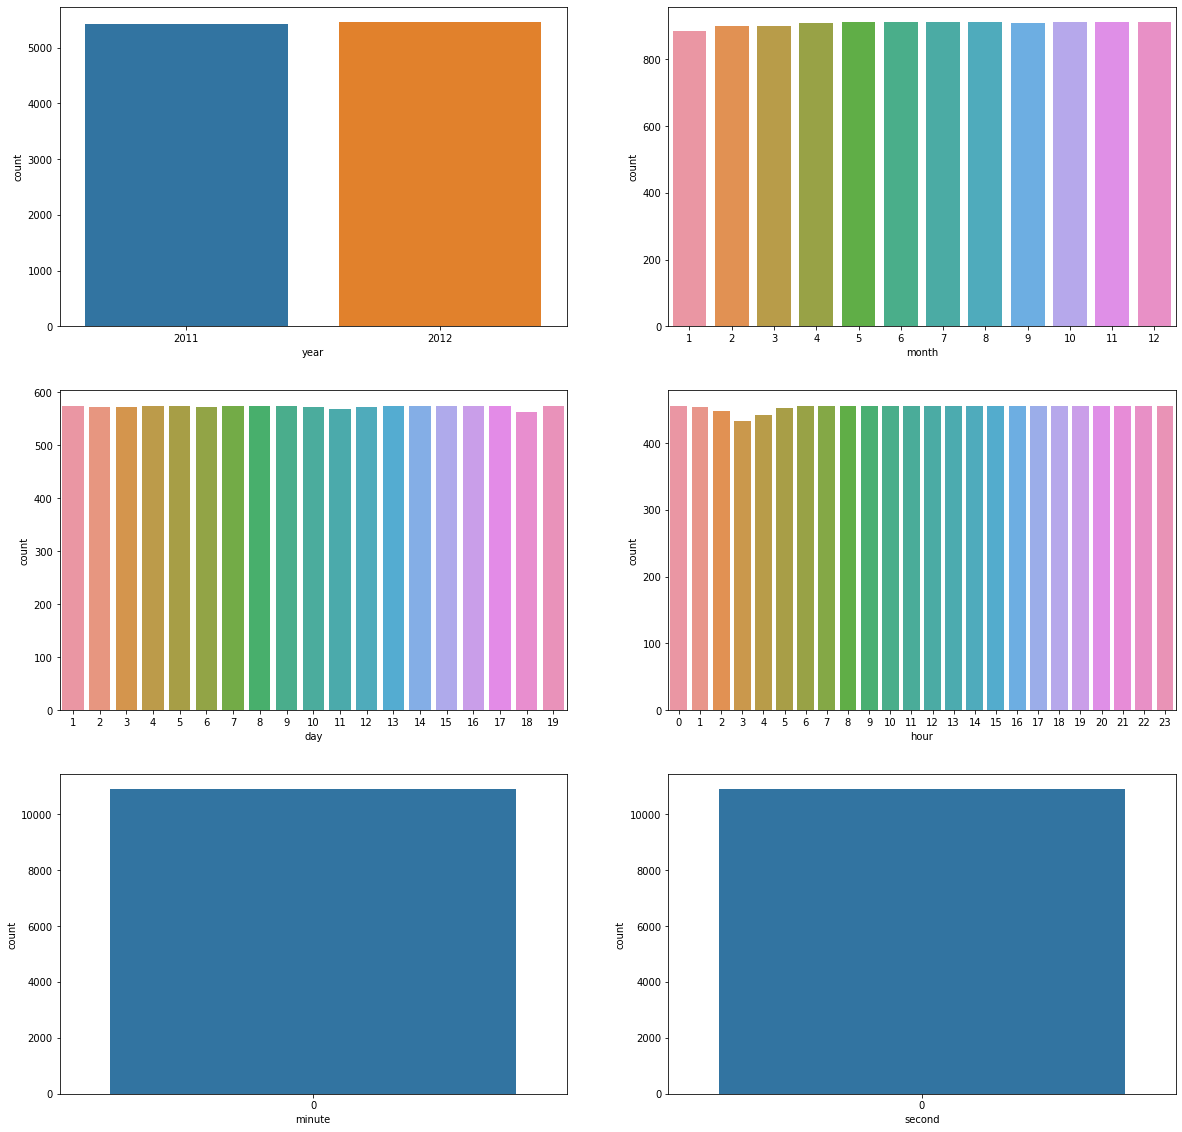

In [26]:
#subplot을 사용하여 3행 2열 칸을 생성해주고 그안에서 시각화한 표를 넣어준다.

fig, axes = plt.subplots(3, 2, figsize=(20,20))

sns.countplot(x = 'year', data = df, ax = axes[0][0])
sns.countplot(x = 'month', data = df, ax = axes[0][1])
sns.countplot(x = 'day', data = df, ax = axes[1][0])
sns.countplot(x = 'hour', data = df, ax = axes[1][1])
sns.countplot(x = 'minute', data = df, ax = axes[2][0])
sns.countplot(x = 'second', data = df, ax = axes[2][1])

##기존 컬럼 시각화

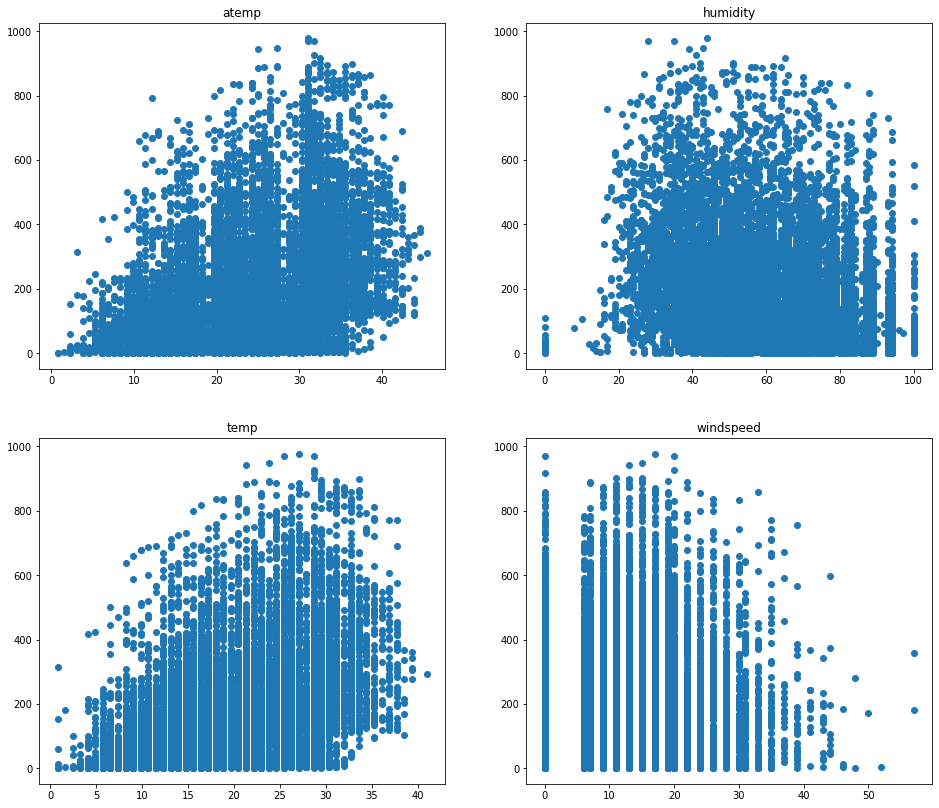

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(16,14))
 
ax[0][0].scatter(df['atemp'], df['count'])
ax[0][1].scatter(df['humidity'], df['count'])
ax[1][0].scatter(df['temp'], df['count'])
ax[1][1].scatter(df['windspeed'], df['count'])
 

ax[0][0].set(title='atemp')
ax[0][1].set(title='humidity')
ax[1][0].set(title='temp')
ax[1][1].set(title='windspeed')
 
plt.show()

####히스토그램으로도 살펴보겠습니다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


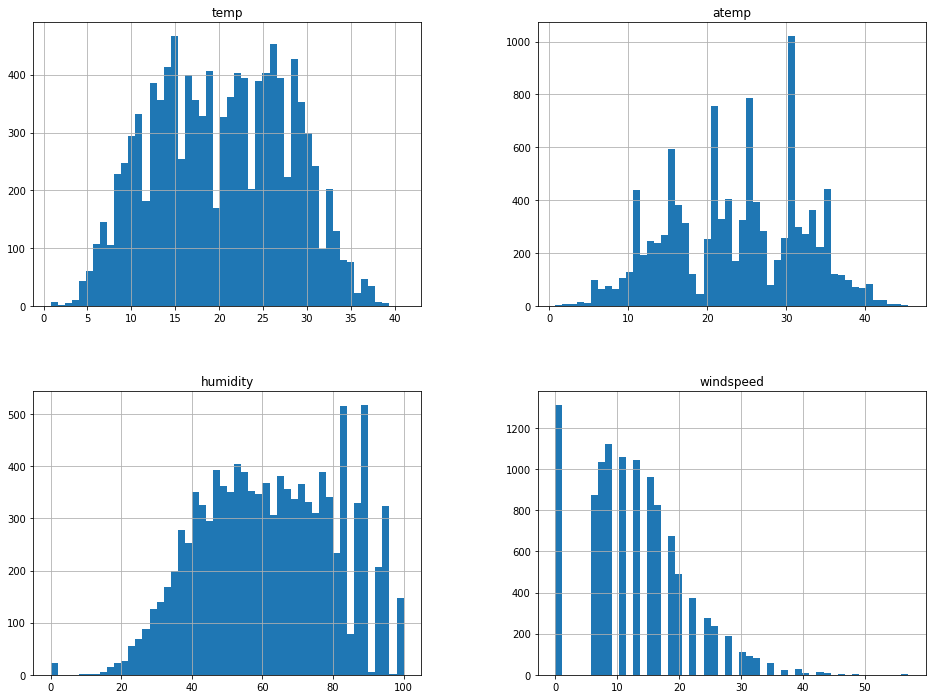

In [28]:
fig, ax = plt.subplots(figsize=(16,12))

df[['temp', 'atemp', 'humidity', 'windspeed']].hist(bins=50, ax=ax)
 
plt.show()

####다음은 휴일과 출근을 구분하는 Feature인 holiday와 workingday의 boxplot을 그려봅시다.

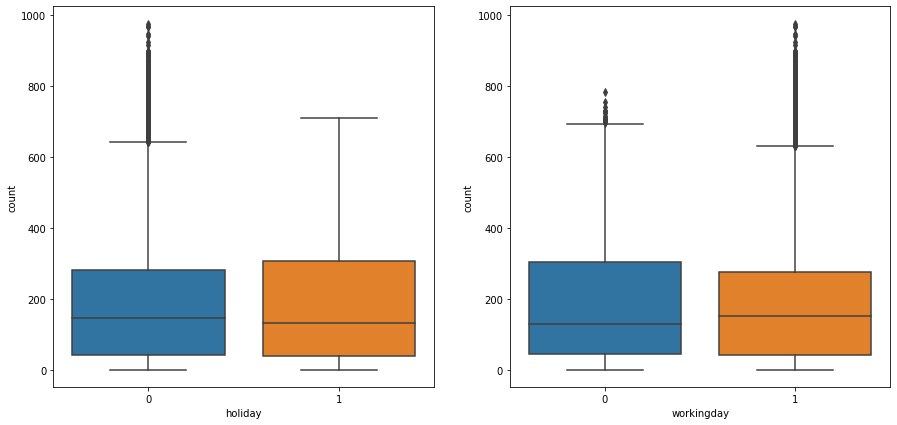

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
 
sns.boxplot(data = df, x='holiday', y='count', ax=ax[0])
sns.boxplot(data = df, x='workingday', y='count', ax=ax[1])
 
plt.show()

####눈에 뛰는 대여량 차이는 없는거 같습니다.

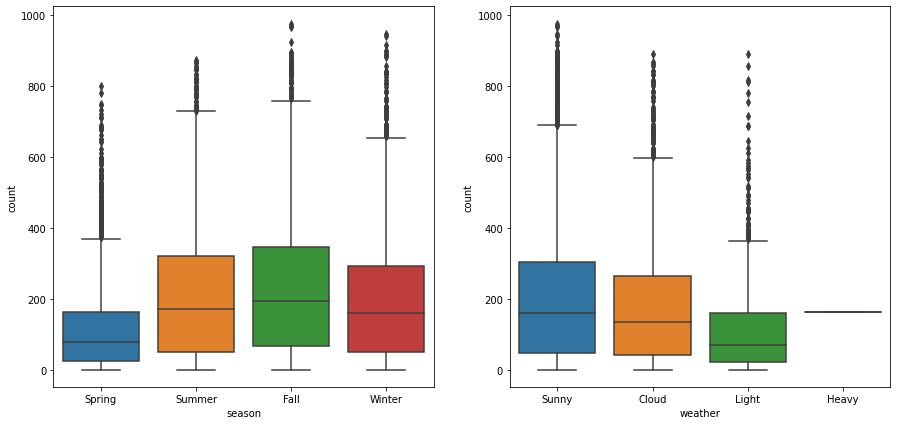

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
 
sns.boxplot(data = df, x='season', y='count', ax=ax[0])
sns.boxplot(data = df, x='weather', y='count', ax=ax[1])
 
ax[0].set(xticklabels = ['Spring', 'Summer', 'Fall', 'Winter'])
ax[1].set(xticklabels = ['Sunny', 'Cloud', 'Light', 'Heavy'])
 
plt.show()

####날씨에 따라서 시각화를 해보았습니다<br/>**season과 weather 모두 자전거 대여량에 유의미한 영향**을 주는 것 같습니다.

##데이터 전처리하기

In [31]:
#모델에 넣을 데이터중 지워도 되는 데이터(주로 단일 값 데이터)를 drop 리스트에 넣어
#drop 함수로 지워줍니다.

drop_columns = ['datetime', 'casual', 'registered']
df.drop(drop_columns, axis = 1, inplace = True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,0,0


####새로운 year, month, day, hour, minute, second 칼럼이 추가되었습니다.
####따라서 datetime 컬럼은 삭제시켰습니다.
####또한 **casual컬럼은 사전에 등록하지 않은 사용자의 자전거 대여 횟수**이고,
####**registered는 사전에 등록한 사용자의 대여 횟수**이며, **casual+registered = count**이므로 따로 필요하지는 않습니다.
####오히려 **상관도가 높아져 예측을 저해할 우려**가 있으므로 두 컬럼을 삭제하였습니다.

##오차율을 계산해주는 함수 만들기

In [32]:
#오차를 계산해주는 함수를 만들어 놓습니다.

from sklearn.metrics import mean_squared_error

def rmse(y, pred):
  val = np.sqrt(mean_squared_error(y, pred))
  return val

def mse(y, pred):
  return mean_squared_error(y, pred)

def rear(y, pred):
  rmse_val = rmse(y, pred)
  mse_val = mse(y, pred)
  print('RMSE: {0:.3f}, MSE: {1:.3f}'.format(rmse_val, mse_val))

####프로젝트에서 요구한대로 **MSE와 RMSE**로 오류값을 출력하기 위해 함수로 구현하였습니다.
####sklearn에서 제공해주는 라이브러리인 **mean_squared_error(mse)**를 사용하면 쉽게 구현이 가능합니다.

##2-4 데이터 분리 및 모델 학습

In [33]:
#X데이터는 count를 제외한 데이터 y에는 count데이터를 넣어줍니다.
#왜냐하면 자전거를 타는 사람들을 예측할것이기 때문입니다.
#train_test_split으로 데이터를 분리해주고
#LinearRegression 모델을 만들고 학습 시키다음
#위에서 만든 함수로 오차율을 확인합니다.

from sklearn.linear_model import LinearRegression, Ridge, Lasso

X = df.drop(['count'], axis = 1, inplace = False)
y = df['count']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.3, random_state = 0)

lr_reg = LinearRegression()
lr_reg.fit(X_train1, y_train1)
pred = lr_reg.predict(X_test1)

rear(y_test1, pred)

RMSE: 140.900, MSE: 19852.694


##2-5 예측결과 시각화

TypeError: ignored

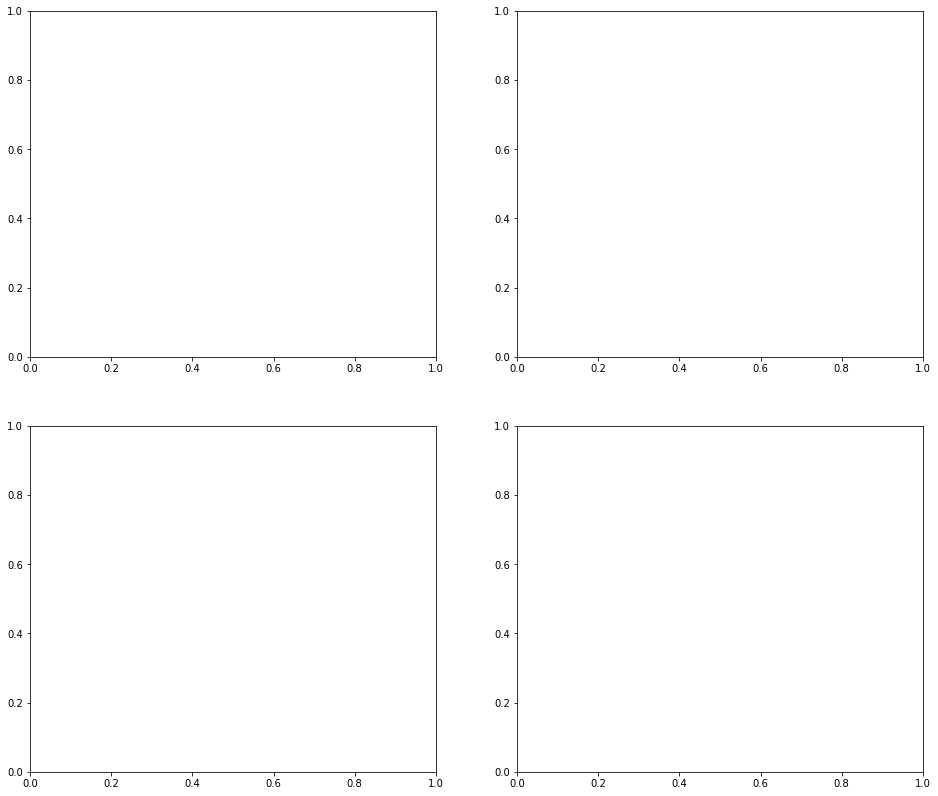

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(16,14))
 
ax[0][0].scatter(X_test1[:,4], y_test1, s = 10)
ax[0][0].scatter(X_test1[:,4], pred, alpha = 0.2, s = 10)
ax[0][1].scatter(X_test1[:,5], y_test1, s = 10)
ax[0][1].scatter(X_test1[:,5], pred, alpha = 0.2, s = 10)
ax[1][0].scatter(X_test1[:,6], y_test1, s = 10)
ax[1][0].scatter(X_test1[:,6], pred, alpha = 0.2, s = 10)
ax[1][1].scatter(X_test1[:,7], y_test1, s = 10)
ax[1][1].scatter(X_test1[:,7], pred, alpha = 0.2, s = 10)
 

ax[0][0].set(title='atemp')
ax[0][1].set(title='humidity')
ax[1][0].set(title='temp')
ax[1][1].set(title='windspeed')
 
plt.show()

####눈물이 나왔습니다.
####하지만 나온 오류를 그대로 치니 해답이 나왔습니다.
####https://zereight.tistory.com/306
####따라하니 오류 해결

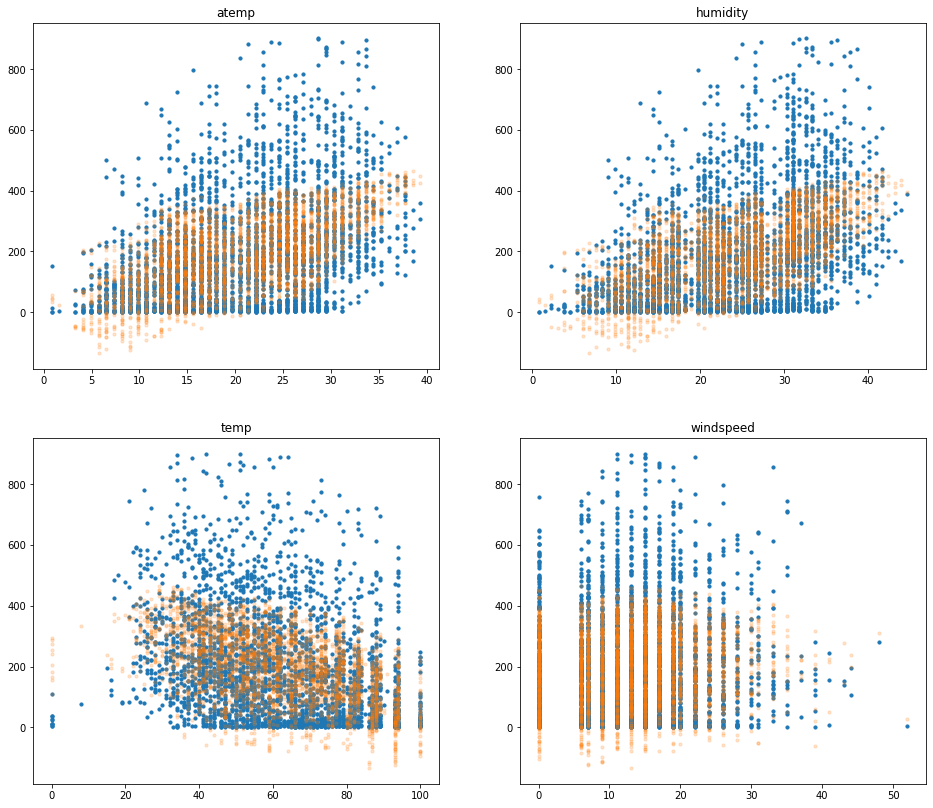

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(16,14))
 
ax[0][0].scatter(X_test1.iloc[:,4], y_test1, s = 10)
ax[0][0].scatter(X_test1.iloc[:,4], pred, alpha = 0.2, s = 10)
ax[0][1].scatter(X_test1.iloc[:,5], y_test1, s = 10)
ax[0][1].scatter(X_test1.iloc[:,5], pred, alpha = 0.2, s = 10)
ax[1][0].scatter(X_test1.iloc[:,6], y_test1, s = 10)
ax[1][0].scatter(X_test1.iloc[:,6], pred, alpha = 0.2, s = 10)
ax[1][1].scatter(X_test1.iloc[:,7], y_test1, s = 10)
ax[1][1].scatter(X_test1.iloc[:,7], pred, alpha = 0.2, s = 10)
 

ax[0][0].set(title='atemp')
ax[0][1].set(title='humidity')
ax[1][0].set(title='temp')
ax[1][1].set(title='windspeed')
 
plt.show()

####RMSE: 140.900, MSE: 19852.694
####실제 타겟 데이터 값인 대여 횟수(count)를 감안하면 예측 **오류로서는 비교적 큰 값**입니다.<br/>실제 값과 예측값이 어느 정도 차이가 나는지<br/> DataFrame의 컬럼으로 만들어서 **오류 값이 가장 큰 순으로 5개만 확인**해 보겠습니다.

##학습 결과 향상 시키기

In [36]:
def get_top_error(y_test, pred, n_tops = 5):
  result_df = pd.DataFrame(y_test1.values, columns = ['real_count'])
  result_df['predicted_count'] = np.round(pred)
  result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])

  print(result_df.sort_values('diff', ascending = False)[:n_tops])

get_top_error(y_test, pred, n_tops = 5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


####가장 큰 상위 오류 값 5개는 546 ~ 568로 예측 오류가 꽤 큽니다.<br/>회귀에서 이렇게 큰 오류가 발생할 경우 가장 먼저 확인해볼것은 **타겟 값의 분포가 <br/>왜곡된 형태를 이루고 있는지 확인**하는 것입니다.<br/>분포는 정규 분포 형태가 가장 좋습니다.<br/>**그렇지 않고 왜곡된 경우에는 회귀 예측 성능이 저하되는 경우가 발생**하기 쉽습니다.<br/>판다스 DataFrame의 hist()를 이용해 자전거 대여 모델의 타겟 값인 count 컬럼이 정규 분포를 이루는지 확인하겠습니다.

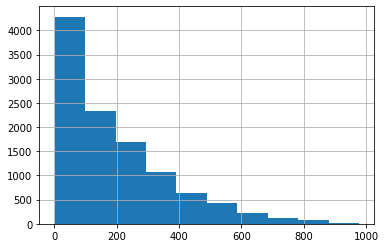

In [37]:
y.hist()

####count 컬럼 값이 정규 분포가 아닌 0 ~ 200 사이에 왜곡돼 있는 것을 알 수 있습니다.<br/>이렇게 왜곡된 값을 분포 형태로 바꾸는 가장 **일반적인 방법은 로그를 적용해 변환**하는 것입니다.<br/>**여기서는 넘파이의 log1p()를 이용**하겠습니다. 적용시키고 분포를 확인해보겠습니다.

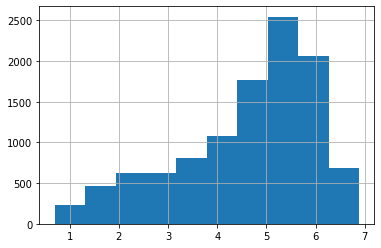

In [38]:
y_log_transform = np.log1p(y)
y_log_transform.hist()

####왜곡 정도가 많이 향상된 모습을 볼수있습니다.
####이를 이용해 다시 학습 시키겠습니다.

In [39]:
y_log = np.log1p(y)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_log, test_size = 0.3, random_state = 0)

lr1 = LinearRegression()
lr1.fit(X_train2, y_train2)
pred = lr1.predict(X_test2)

y_exp = np.expm1(y_test2)

pred_exp = np.expm1(pred)

rear(y_exp, pred_exp)

RMSE: 162.594, MSE: 26436.896





```
y_exp = np.expm1(y_test2)
pred_exp = np.expm1(pred)
```
####위 코드에 expm1은 원래 값으로 되돌리는 것입니다<br/>즉 로그를 통해 변경된 값으로 **학습**하고 **예측시에는 expm1을 통해 원래 값으로 돌아가서 예측하는 것**입니다.




####RMSE: 162.594, MSE: 26436.896
####둘다 늘어났습니다.
####이유가 무엇일까요?
####각 피처의 **회귀 계수 값을 시각화**해 보겠습니다.

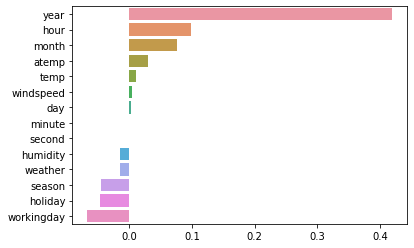

In [40]:
coef = pd.Series(lr1.coef_, index = X.columns)
coef_sort = coef.sort_values(ascending = False)
sns.barplot(x = coef_sort.values, y = coef_sort.index)

####Year 피처의 회귀 계수 값이 **독보적으로 큰 값**을 가지고 있습니다.<br/>
####year는 2011년 2012년 두개의 값으로 되어있습니다. <br/>year에 따라서 대여 횟수가 영향을 받는 다는건 납득하기가 어렵습니다.<br/> 
####다양한 요인이 훨씬 더 많은데 year의 회귀 계수가 이렇게 큰 이유는 무엇일까요?<br/> 
####year은 연도를 뜻하므로 **숫자형으로 되어있습니다**.<br/> 더군다나 아주 큰 값인 2011, 2012년으로 돼 있습니다. <br/>
####사이킷런은 **이처럼 숫자형 카테고리 값을 선형 회귀에 사용할 경우 회귀 계수를 연산할 때 <br/>
####이 숫자형 값에 크게 영향을 받는 경우가 발생**할 수 있습니다.<br/> 
####따라서 선형 회귀에서는 이러한 **피처 인코딩에 원-핫 인코딩을 적용**해 변환해야 합니다.<br/> 
####판다스의 **get_dummies()를 이용해 year 컬럼을 비롯한 <br/>
####여러가지 컬럼도 모두 원-핫 인코딩한 후에 다시 예측** 성능을 확인해 보겠습니다.

In [41]:
X_one = pd.get_dummies(X, columns = ['year', 'month', 'day', 'hour', 'holiday',
                                      'workingday', 'season', 'weather'])

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_one, y_log, test_size = 0.3,
                                                        random_state = 0)

def get_model_predict(model, X_train3, X_test3, y_train3, y_test3, is_expm1 = False):
  model.fit(X_train3, y_train3)
  pred = model.predict(X_test3)
  if is_expm1:
    y_test3 = np.expm1(y_test3)
    pred = np.expm1(pred)
  print("###", model.__class__.__name__, '###')
  rear(y_test3, pred)

lr2 = LinearRegression()
ri1 = Ridge(alpha = 10)
la1 = Lasso(alpha = 0.01)

for model in [lr2, ri1, la1]:
  get_model_predict(model, X_train3, X_test3, y_train3, y_test3, is_expm1 = True)

### LinearRegression ###
RMSE: 97.688, MSE: 9542.881
### Ridge ###
RMSE: 98.529, MSE: 9707.883
### Lasso ###
RMSE: 113.219, MSE: 12818.499


####원-핫 인코딩을 적용하고 나서 선형 회귀의 예측 성능이 많이 향상되었습니다.
####다른 모델들도 준수한 결과를 보이고 있습니다.
####다른 모델들도 **한번 사용**해보겠습니다.

In [42]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf = RandomForestRegressor(n_estimators = 500)
gbm = GradientBoostingRegressor(n_estimators = 500)
xgb = XGBRegressor(n_estimators = 500)
lgbm = LGBMRegressor(n_estimators = 500)

for model in [rf, gbm, xgb, lgbm]:
  get_model_predict(model, X_train3.values, X_test3.values, y_train3.values, y_test3.values, is_expm1 = True)

### RandomForestRegressor ###
RMSE: 50.084, MSE: 2508.414
### GradientBoostingRegressor ###
RMSE: 53.317, MSE: 2842.657
[14:03:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
### XGBRegressor ###
RMSE: 58.245, MSE: 3392.516
### LGBMRegressor ###
RMSE: 47.215, MSE: 2229.223


####역시 성능 좋은 모델을 찾을 때는 하나하나 실행해보는게 좋은거 같습니다.

##마치며

####이번 Exploration 노드에서는 총 두가지 프로젝트를 진행 하였습니다.<br/>첫번째는 sklearn안에 있는 데이터 셋을 통하여 **다중 선형회귀 함수를 직접 만들고 실행** 시켜보았습니다.

####함수를 직접 만들어야 하는 만큼 **데이터를 다양한 시각으로 분석**하고 더 오래 살펴본거 같습니다.<br/>처음에는 데이터 값이 0.0으로 시작하는 실수로만 나와서 데이터를 잘못입력한줄 알았지만 아니였습니다. 

####sklearn 자체에서 데이터를 그렇게 맞춘거였습니다.<br/>첫번째 시도는 정규화를 하지 않고 진행해보았습니다.<br/> 정규화를 진행하지 않고 오차값을 3000미만으로 맞출라면 학습률를 늘리거나 반복문을 많이 돌려야합니다.<br/>하지만 그런 모델을 만들게 된다면 고용량 데이터가 들어갈시 제대로 작동하지 못할것이고 이번 프로젝트에서도 그런 방법을 원한것은 아니라는 생각이 들었습니다.<br/>

####그래서 다양한 방법이 존재하겠지만 저는 **정규화 방법(MinMax)을 사용**했습니다.<br/> 물론 정규화를 한다고 해서 모든 모델에 성능이 좋아지는 것은 아니지만 이번 데이터에서는 정규화를 하는 방법이 아주 나이스 했습니다.<br/> 핑계처럼 들릴수있지만 시간이 더 많았다면 다양한 방법을 많이 시도해보았을꺼 같습니다. ㅎㅎ

####두번째 프로젝트에서는 **LinearRegression라는 선형회귀 모델을 직접 사용**하였습니다. <br/>**릿지나 라쏘 같은 모델도 사용**해보았습니다.<br/> 두번째 프로젝트 데이터는 캐글에서 지원하는 자전거 수요에 관련된 데이터였습니다.<br/> 모델을 직접 만들지 않고 실존하는 모델을 정의하고 쓰기만 하면 된다고 우습게 생각했다가 큰코 다쳤습니다.<br/> 정확도와 오차율이 생각보다 높게 나와서 낮추는데 고생을 많이한거 같습니다.

####두번째 프로젝트는 처음 RMSE값이 150미만으로 나와서 그냥 제출을 해버릴까라는 생각이 들기도 하였지만 다른 방향으로 생각을 해보면 기본적인 조건들만 맞추었는데도 150이하가 나온다는것은 **새로운 방법을 시도해보면 더 좋은 값으로 나올 수 있다는 소리였기에 마음을 다잡고 여러가지 방법에 도전**해봤습니다.<br/> 처음에는 값이 왜곡되어서 **로그를 적용하여 변화**시켰지만 오히려 값이 더 않좋게 나왔습니다. 문제는 연도에서 값이 다른 값에 비해 너무 높게 잡혀있어서였습니다. **원-핫 인코딩**으로 해결하였습니다.

####이번 프로젝트에서 아쉬웠던점은 **실력의 부재** 같습니다.<br/>쉽게 직관적이게 가독성 좋게 코드를 짤수도 있었을텐데 라는 생각이 많이 들던 프로젝트 였습니다.<br/> **데이터를 전처리**를 깔끔하게하여 **모델 성능을 더 높인다던가, 다른 방법으로 시각화를 도전**해본다던가,<br/>지금보다 더 다양한 모델들을 사용한다던가 그런걸 많이 못해본것이 아쉽습니다.

####개인적으로 진행해보고 싶던게 있었습니다.<br/>첫번째 프로젝트 오차율을 1000대로 맞추고 싶어 하루를 다 보낸적이 있습니다.<br/> 결국에는 실패했습니다. 아마 딥러닝 모델을 학습 횟수를 늘리게 된다면 맞출수있겠지만<br/> 그런건 이번 노드에서 원하는 것이 아니였을것입니다. 나중에라도 따로 도전해서 꼭 1000대로 맞추어보고 싶습니다. 